 Sentiment Analysis Project - Data Exploration
Dataset Shape: (50000, 2)
Columns: ['review', 'sentiment']
Memory Usage: 68.46 MB

First 5 rows:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



 Missing Values:
review       0
sentiment    0
dtype: int64
Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


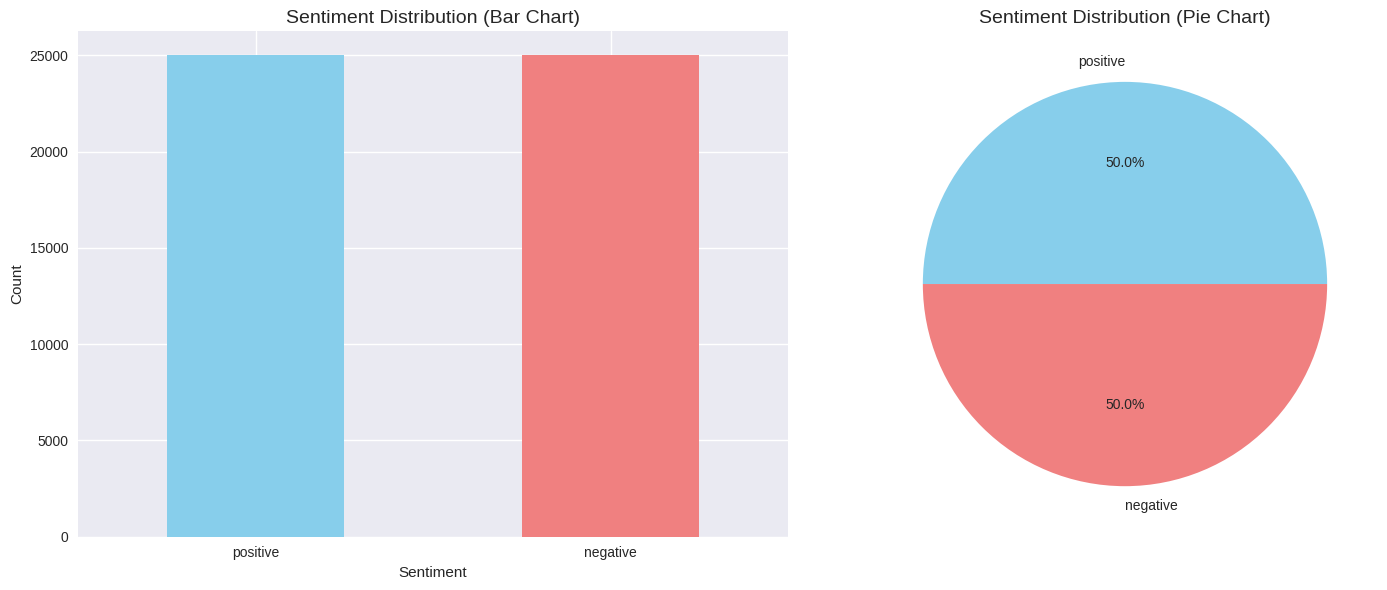

Text Length Statistics by Sentiment:


review_length                                                        \
                  count        mean          std   min    25%    50%      75%   
sentiment                                                                       
negative        25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive        25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

                   word_count                                             \
               max      count       mean         std   min    25%    50%   
sentiment                                                                  
negative    8969.0    25000.0  229.46456  164.947795   4.0  128.0  174.0   
positive   13704.0    25000.0  232.84932  177.497046  10.0  125.0  172.0   

                          
             75%     max  
sentiment                 
negative   278.0  1522.0  
positive   284.0  2470.0

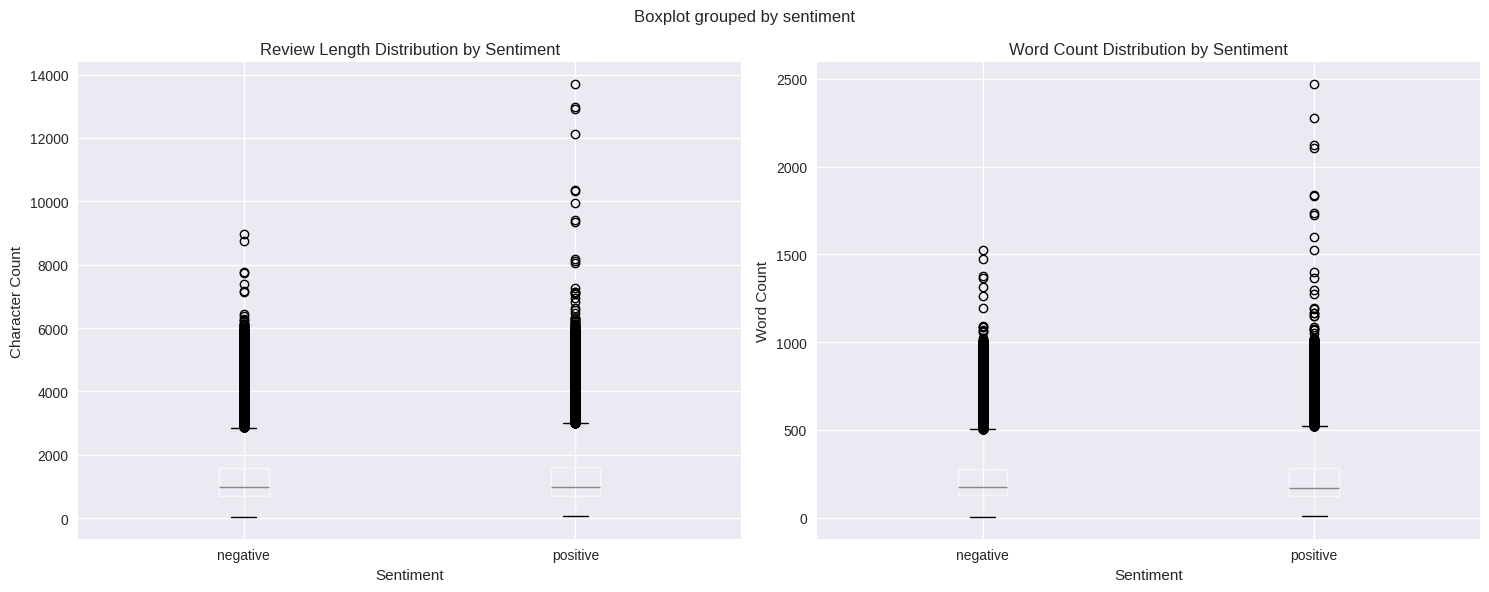

 Sample Positive Reviews:
--------------------------------------------------
1. One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...
2. A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...
3. I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is wi...

Sample Negative Reviews:
--------------------------------------------------
1. Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, J...
2. This show was a

In [46]:
# Assuming this cell is where the initial data loading and exploration happens
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print(" Sentiment Analysis Project - Data Exploration")
print("=" * 50)

# Load the original dataset here
df = pd.read_csv('/content/IMDB Dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*30)

print("First 5 rows:")
display(df.head())

print(f"\n Missing Values:")
print(df.isnull().sum())

sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sentiment_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Sentiment Distribution (Bar Chart)', fontsize=14)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

ax2.pie(sentiment_counts.values, labels=sentiment_counts.index,
autopct='%1.1f%%',
colors=['skyblue', 'lightcoral'])
ax2.set_title('Sentiment Distribution (Pie Chart)', fontsize=14)
plt.tight_layout()
plt.show()

# Calculate review length and word count using the original 'review' column
# This section is now correctly placed after loading the original df
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

print("Text Length Statistics by Sentiment:")
length_stats = df.groupby('sentiment')[['review_length',
'word_count']].describe()
display(length_stats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df.boxplot(column='review_length', by='sentiment', ax=ax1)
ax1.set_title('Review Length Distribution by Sentiment')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Character Count')

df.boxplot(column='word_count', by='sentiment', ax=ax2)
ax2.set_title('Word Count Distribution by Sentiment')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Word Count')
plt.tight_layout()
plt.show()

print(" Sample Positive Reviews:")
print("-" * 50)
for i, review in enumerate(df[df['sentiment'] ==
'positive']['review'].head(3), 1):
 print(f"{i}. {review[:200]}...")
print()
print("Sample Negative Reviews:")
print("-" * 50)
for i, review in enumerate(df[df['sentiment'] ==
'negative']['review'].head(3), 1):
 print(f"{i}. {review[:200]}...")
print()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preprocessing all reviews...
 Preprocessing Impact:
Average original length: 1309 characters
Average processed length: 815 characters
Reduction: 37.7%


,review,cleaned_review,processed_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,one reviewer mentioned watching episode youll ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...


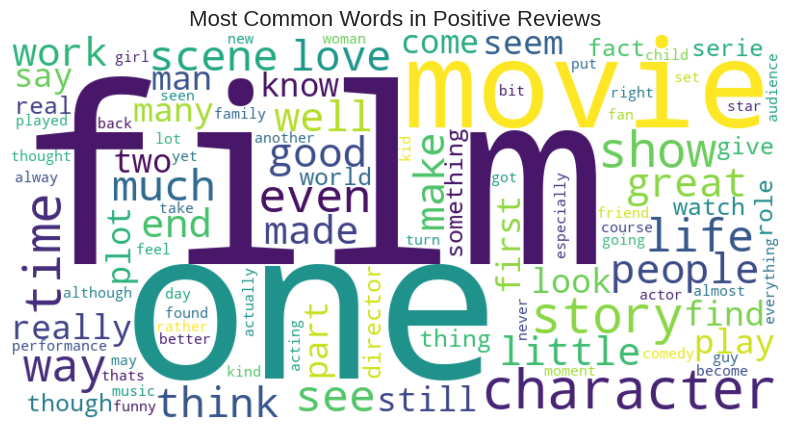

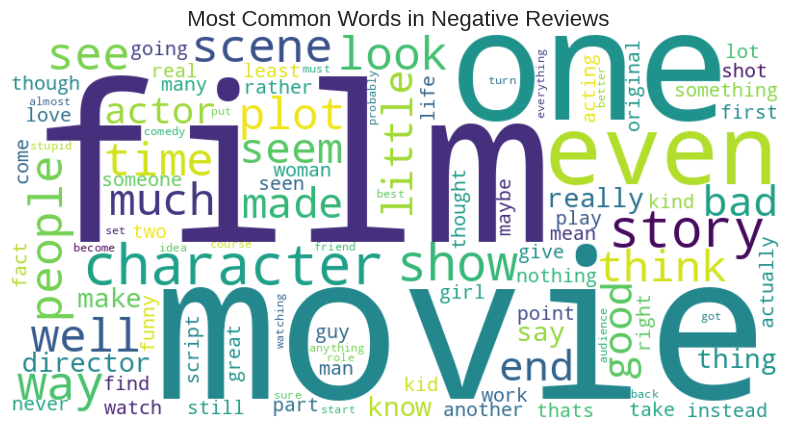

Processed data saved to '/content/IMDB_processed_dataset.csv'
Dataset ready for modeling with 50000 samples


In [48]:
# This cell performs preprocessing and saves the processed data
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure NLTK data is downloaded by catching LookupError
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    # Catch LookupError for wordnet
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')


# The DataFrame 'df' with the original 'review' column should already be loaded
# from the previous cell. No need to reload here from the potentially overwritten file.
# If you were running this cell independently, you would need to load the original df:
# df = pd.read_csv('/content/IMDB Dataset.csv.zip')
# print(f"Loaded {len(df)} reviews for preprocessing")


def clean_text(text):
    # Check if text is not None before proceeding
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def advanced_preprocess(text):
    # Check if text is not None and is a string before processing
    if not isinstance(text, str) or pd.isna(text):
        return "" # Return empty string for non-string/None inputs
    text = clean_text(text)
    # Ensure tokenization works correctly by checking if tokens are generated
    tokens = word_tokenize(text)
    if not tokens: # Handle cases where tokenization results in an empty list
        return ""
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and
              len(token) > 2]

    # Ensure lemmatizer is initialized only once if performance is critical,
    # but for simplicity here, re-initializing is fine.
    # Also ensure wordnet is actually downloaded before using WordNetLemmatizer
    try:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    except LookupError:
         print("Warning: WordNet not found. Skipping lemmatization.")
         pass # Skip lemmatization if wordnet is not available

    return ' '.join(tokens)

# Apply preprocessing
print("Preprocessing all reviews...")
# Ensure the original 'review' column exists before applying functions
if 'review' in df.columns:
    df['cleaned_review'] = df['review'].apply(clean_text)
    # Add error handling for advanced_preprocess just in case
    try:
        df['processed_review'] = df['review'].apply(advanced_preprocess)
    except Exception as e:
        print(f"An error occurred during advanced preprocessing: {e}")
        df['processed_review'] = "" # Assign empty strings in case of error


    # Calculate preprocessing impact
    # Add checks for processed_review column before calculating lengths
    if 'processed_review' in df.columns:
        df['original_length'] = df['review'].str.len()
        df['processed_length'] = df['processed_review'].str.len()

        print(" Preprocessing Impact:")
        print(f"Average original length: {df['original_length'].mean():.0f} characters")
        print(f"Average processed length: {df['processed_length'].mean():.0f} characters")
        print(f"Reduction: {((df['original_length'].mean() - df['processed_length'].mean()) / df['original_length'].mean() * 100):.1f}%")

        display(df[['review', 'cleaned_review', 'processed_review']].head(3))
    else:
         print("'processed_review' column was not created. Skipping length calculation.")

else:
    print("Original 'review' column not found. Skipping preprocessing.")


# Definition for create_wordcloud (should be in an earlier cell or defined here)
def create_wordcloud(text, title):
  # Ensure text is not empty before generating wordcloud
  if text:
    wordcloud = WordCloud(width=800, height=400,background_color='white',max_words=100, colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()
  else:
      print(f"No text available to generate wordcloud for '{title}'")


# Generate wordclouds using the 'processed_review' column
if 'processed_review' in df.columns:
    # Use .dropna() just in case preprocessing resulted in None/NaN
    positive_text = ' '.join(df[df['sentiment'] == 'positive']['processed_review'].dropna())
    create_wordcloud(positive_text, 'Most Common Words in Positive Reviews')
    negative_text = ' '.join(df[df['sentiment'] == 'negative']['processed_review'].dropna())
    create_wordcloud(negative_text, ' Most Common Words in Negative Reviews')
else:
    print("'processed_review' column not found. Skipping wordcloud generation.")

# Save the processed data to a NEW file name
df_processed = df[['processed_review', 'sentiment']].copy()
# Change the output filename here
df_processed.to_csv('/content/IMDB_processed_dataset.csv', index=False)
print("Processed data saved to '/content/IMDB_processed_dataset.csv'")
print(f"Dataset ready for modeling with {len(df_processed)} samples")

In [2]:
# This cell performs the modeling
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import LinearSVC # Add this import

# Load the processed data from the NEW file
df = pd.read_csv('/content/IMDB_processed_dataset.csv')

# Ensure 'processed_review' column exists before proceeding
if 'processed_review' not in df.columns:
    print("Error: 'processed_review' column not found in the loaded data. Cannot proceed with modeling.")
else:
    X = df['processed_review']
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42, stratify=y)
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    print("\n Creating TF-IDF features...")
    tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=2,
    max_df=0.95)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    print(f"Feature matrix shape: {X_train_tfidf.shape}")
    print(f"Feature names sample: {tfidf.get_feature_names_out()[:10]}")

    # These lines were incorrectly indented inside the else block
    # Moved them out to be at the correct scope

    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Naive Bayes': MultinomialNB(),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Linear SVM': LinearSVC(random_state=42, max_iter=10000) # Replaced SVC with LinearSVC
    }

    results = {}
    trained_models = {}

    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train_tfidf, y_train)
        trained_models[name] = model

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

        # Evaluate on the test set
        y_pred = model.predict(X_test_tfidf)
        test_accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results[name] = {
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std(),
            'Test Accuracy': test_accuracy
        }

        print(f"{name} - CV: {cv_scores.mean():.4f} (±{cv_scores.std():.4f}), Test: {test_accuracy:.4f}")

    # Display the results summary
    results_df = pd.DataFrame(results).T
    display(results_df)

Training set size: 40000
Test set size: 10000

 Creating TF-IDF features...
Feature matrix shape: (40000, 10000)
Feature names sample: ['aaron' 'abandon' 'abandoned' 'abbott' 'abc' 'ability' 'able' 'able get'
 'able make' 'able see']

Training Logistic Regression...
Logistic Regression - CV: 0.8900 (±0.0039), Test: 0.8924

Training Naive Bayes...
Naive Bayes - CV: 0.8649 (±0.0025), Test: 0.8665

Training Random Forest...
Random Forest - CV: 0.8486 (±0.0043), Test: 0.8489

Training Linear SVM...
Linear SVM - CV: 0.8826 (±0.0034), Test: 0.8842


,CV Mean,CV Std,Test Accuracy
Logistic Regression,0.890025,0.003914,0.8924
Naive Bayes,0.864900,0.002461,0.8665
Random Forest,0.848550,0.004251,0.8489
Linear SVM,0.882575,0.003386,0.8842


Best Model: Logistic Regression
Test Accuracy: 0.8924

 Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5000
    positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



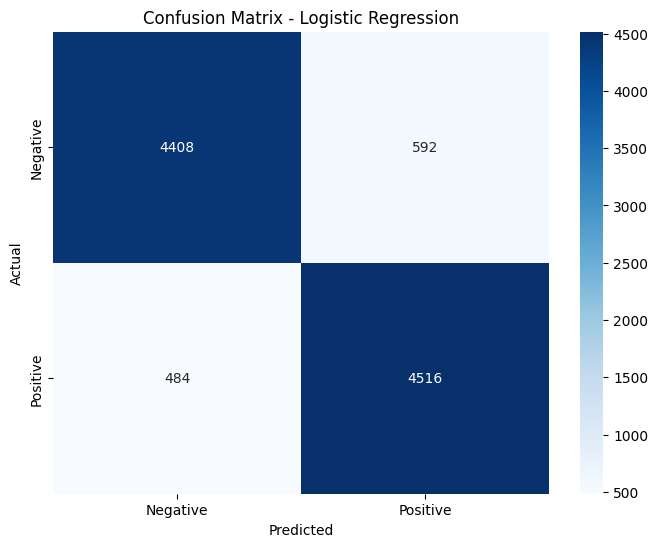


 Top 10 Positive Sentiment Features:
  great: 7.0817
  excellent: 6.5708
  perfect: 5.4943
  amazing: 4.8601
  wonderful: 4.6559
  best: 4.5620
  hilarious: 4.4679
  loved: 4.3118
  favorite: 4.2453
  one best: 4.1047

 Top 10 Negative Sentiment Features:
  worst: -9.1885
  bad: -7.7434
  awful: -7.6422
  waste: -6.9277
  boring: -6.1204
  poor: -5.7520
  terrible: -5.5533
  nothing: -5.4741
  worse: -5.0422
  dull: -5.0040


In [3]:
best_model_name = results_df['Test Accuracy'].idxmax()
best_model = trained_models[best_model_name]
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {results_df.loc[best_model_name, 'Test Accuracy']:.4f}")
# Detailed evaluation
y_pred = best_model.predict(X_test_tfidf)
y_pred_proba = best_model.predict_proba(X_test_tfidf)
print(f"\n Detailed Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Negative', 'Positive'],
yticklabels=['Negative', 'Positive'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Feature importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
  feature_names = tfidf.get_feature_names_out()
coefficients = best_model.coef_[0]
# Top positive features
top_positive = np.argsort(coefficients)[-10:]
# Top negative features
top_negative = np.argsort(coefficients)[:10]
print("\n Top 10 Positive Sentiment Features:")
for i in reversed(top_positive):
  print(f"  {feature_names[i]}: {coefficients[i]:.4f}")
print("\n Top 10 Negative Sentiment Features:")
for i in top_negative:
  print(f"  {feature_names[i]}: {coefficients[i]:.4f}")

In [5]:
import os # Import the os module
import json # Import the json module

# Define the directory path
model_dir = '../models'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Created directory: {model_dir}")

# Now, save the model and vectorizer
joblib.dump(best_model,f'{model_dir}/best_sentiment_model_{best_model_name.lower().replace(" ", "_")}.pkl')
joblib.dump(tfidf, f'{model_dir}/tfidf_vectorizer.pkl')
print(f"Model saved: {model_dir}/best_sentiment_model_{best_model_name.lower().replace(' ', '_')}.pkl")
print(f"Vectorizer saved: {model_dir}/tfidf_vectorizer.pkl")

# Create model info
model_info = {
    'model_type': best_model_name,
    'test_accuracy': results_df.loc[best_model_name, 'Test Accuracy'],
    'cv_mean': results_df.loc[best_model_name, 'CV Mean'],
    'cv_std': results_df.loc[best_model_name, 'CV Std'],
    'features': X_train_tfidf.shape[1]
}

# Save model info
with open(f'{model_dir}/model_info.json', 'w') as f:
    json.dump(model_info, f, indent=2)
print(f"Model information saved to {model_dir}/model_info.json")

Created directory: ../models
Model saved: ../models/best_sentiment_model_logistic_regression.pkl
Vectorizer saved: ../models/tfidf_vectorizer.pkl
Model information saved to ../models/model_info.json


In [7]:
import pandas as pd
import numpy as np
import joblib
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
# Load model and vectorizer
try:
  # Corrected the missing closing parenthesis for joblib.load calls
  model = joblib.load('../models/best_sentiment_model_logistic_regression.pkl')
  tfidf = joblib.load('../models/tfidf_vectorizer.pkl')
  print("Model and vectorizer loaded successfully!")
except Exception as e: # Catch a more general exception and print it for debugging
  # Corrected the unterminated string literal
  print(f"Could not load model or vectorizer. Make sure you've run the training notebook first. Error: {e}")

Model and vectorizer loaded successfully!


In [9]:
def preprocess_text(text):
    """Preprocess text for prediction"""
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and
              len(token) > 2]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Test the preprocessing
# Corrected the multiline string definition
test_text = """This movie was absolutely amazing! I loved every minute of
it."""
print(f"Original: {test_text}")
print(f"Processed: {preprocess_text(test_text)}")

Original: This movie was absolutely amazing! I loved every minute of
it.
Processed: movie absolutely amazing loved every minute


In [12]:
def predict_sentiment(text):
    """Predict sentiment of given text"""
    if not text.strip():
        # Corrected return value to match the function's expected output format
        return "neutral", 0.0, 0.0, 0.0 # Return a tuple with placeholder probabilities

    # Preprocess text
    processed_text = preprocess_text(text)

    # Transform using TF-IDF
    text_tfidf = tfidf.transform([processed_text])

    # Predict
    prediction = model.predict(text_tfidf)[0]
    probabilities = model.predict_proba(text_tfidf)[0]
    confidence = max(probabilities)

    # Get probability for each class
    # Ensure model.classes_ is accessible and in the expected order
    # Safely get the index for 'negative' and 'positive'
    try:
        neg_index = list(model.classes_).index('negative')
        pos_index = list(model.classes_).index('positive')
        prob_negative = probabilities[neg_index]
        prob_positive = probabilities[pos_index]
    except ValueError:
        # Handle case where 'negative' or 'positive' class is not found
        print("Warning: 'negative' or 'positive' class not found in model classes.")
        prob_negative = 0.0
        prob_positive = 0.0


    # Return the prediction, confidence, and probabilities
    return prediction, confidence, prob_negative, prob_positive

# Test prediction
test_result = predict_sentiment("This movie was terrible and boring!")
print(f"Prediction: {test_result}")

Prediction: ('negative', np.float64(0.9981920416069535), np.float64(0.9981920416069535), np.float64(0.0018079583930465022))


In [17]:
text_input = widgets.Textarea(
value='Enter your text here...',
placeholder='Type your review or text here',
description='Text:',
layout=widgets.Layout(width='100%', height='100px')
)
predict_button = widgets.Button(
# Removed the newline character after the opening quote
description=' Analyze Sentiment',
button_style='primary',
layout=widgets.Layout(width='200px')
)
output_area = widgets.Output()
def on_predict_button_clicked(b):
    with output_area:
        clear_output()
        text = text_input.value
        if text and text != 'Enter your text here...':

            prediction, confidence, prob_neg, prob_pos = \
            predict_sentiment(text)

            # Corrected the f-strings by removing the newline right after the opening quote
            # and adding explicit \n where needed for formatting.
            print("\n\n SENTIMENT ANALYSIS RESULTS")
            print("=" * 40)
            print(f"\n  Input Text: {text[:100]}{'...' if len(text) > 100 else ''}")
            print(f"\n  Predicted Sentiment: {prediction.upper()}")
            print(f"\n  Confidence: {confidence:.2%}")
            print(f"\n  Probability Breakdown:")
            print(f"\n  Positive: {prob_pos:.2%}")
            print(f"\n  Negative: {prob_neg:.2%}")

            # Create visualization
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

            # Confidence meter
            colors = ['red' if prediction == 'negative' else 'green']
            ax1.barh(['Confidence'], [confidence], color=colors)
            ax1.set_xlim(0, 1)
            ax1.set_title('Prediction Confidence')


            ax1.set_xlabel('Confidence Score')

            # Probability comparison
            sentiments = ['Negative', 'Positive']
            probabilities = [prob_neg, prob_pos]
            colors = ['lightcoral', 'lightgreen']

            bars = ax2.bar(sentiments, probabilities, color=colors)
            ax2.set_ylim(0, 1)
            ax2.set_title('Sentiment Probabilities')
            ax2.set_ylabel('Probability')

            # Add value labels on bars
            for bar, prob in zip(bars, probabilities):
                height = bar.get_height()
                ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{prob:.2%}', ha='center', va='bottom')

            plt.tight_layout()
            plt.show()

        else:
            # Corrected the f-string here as well
            print("\n\n Please enter some text to analyze!")

predict_button.on_click(on_predict_button_clicked)

# Display the interface
display(widgets.VBox([
widgets.HTML("<h2>\n\n Interactive Sentiment Analysis Tool</h2>"),
text_input,
predict_button,
output_area
]))

In [22]:
sample_texts = [
"This movie was absolutely fantastic! Great acting and storyline.",
"Terrible film, complete waste of time and money.",
"The movie was okay, nothing special but not bad either.",
"I loved the cinematography but the plot was confusing.",
"Worst movie I've ever seen, don't watch it!",
"Amazing performances by all actors, highly recommended!",
"The movie had its moments but overall disappointing.",
"Brilliant direction and excellent screenplay.",
"Boring and predictable, fell asleep halfway through.",
"A masterpiece of modern cinema, truly inspiring!"
]
print("BATCH TESTING WITH SAMPLE TEXTS")
print("=" * 50)
results = []
for i, text in enumerate(sample_texts, 1):
  prediction, confidence, prob_neg, prob_pos = predict_sentiment(text)
results.append({
'Text': text[:50] + '...' if len(text) > 50 else text,
'Prediction': prediction,
'Confidence': f"{confidence:.2%}",
'Positive_Prob': f"{prob_pos:.2%}",
'Negative_Prob': f"{prob_neg:.2%}"
})
emoji = "" if prediction == 'positive' else ""
print(f"{i:2d}. {emoji} {prediction.upper()} ({confidence:.2%}) -{text[:60]}{'...' if len(text) > 60 else ''}")
# Create results DataFrame
results_df = pd.DataFrame(results)
print(f"\n DETAILED RESULTS:")
display(results_df)

BATCH TESTING WITH SAMPLE TEXTS
10.  POSITIVE (92.83%) -A masterpiece of modern cinema, truly inspiring!

 DETAILED RESULTS:


,Text,Prediction,Confidence,Positive_Prob,Negative_Prob
0,"A masterpiece of modern cinema, truly inspiring!",positive,92.83%,92.83%,7.17%
